# Regresión Lineal simple
Para poder trabajar con el archivo tenemos que guardar sus datos. Estos estan en el archivo llamado "Felicidad_y_GDP.csv". Antes de empezar tenemos que importar la libreria **pandas** para poder leer el archivo. Ahora, para ver los primeros 10 paises con más felicidad es usar la funcion `sort_values()` donde en sus parametros ponemos la variable que queremos ordenar y luego ponerlo descendente. Después hacemos lo mismo pero ahora con GDP.

In [64]:
import pandas as pd
data = pd.read_csv("Felicidad_y_GDP.csv")
data_sort = data.sort_values("Felicidad",ascending = False)
print("Los 10 paises más felices")
print(data_sort.head(10))
print("")
print("Los 10 paises con más GDP")
data_sort = data.sort_values("GDP",ascending = False)
print(data_sort.head(10))

Los 10 paises más felices
          Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11

Los 10 paises con más GDP
               Pais  Felicidad           GDP
15    United States     6.9768  2.089370e+13
70            China     5.5853  1.468770e+13
52            Japan     6.0389  5.040110e+12
13          Germany     7.0341  3.846410e+12
16   United Kingdom     6.9425  2.756900e+12
130           India     3.7771  2.667690e+12
19           France     6.6867  2.630320e+12
29            Italy     6.4667  1.892570e+12
14           Canada     7.0251  1.645420e+12
57      South Korea     5.9351  1.637900e+12


Ahora graficaremos los datos. Primero importamos las librerías **matplotlib.pyplot** y **numpy**, que nos permiten hacer gráficos y cálculos matemáticos de manera más rápida. Para graficar, utilizamos la función `scatter()` de **matplotlib.pyplot**. En sus parámetros debemos colocar los datos correspondientes a los ejes: en el eje horizontal usamos el logaritmo en base 10 del GDP, y en el eje vertical el nivel de felicidad. Finalmente, llamamos a `show()` para mostrar la gráfica. 

Nota: para que en Jupyter Notebooks se despliegue la gráfica tenemos que insertar `%matplotlib inline` en nuestro codigo.

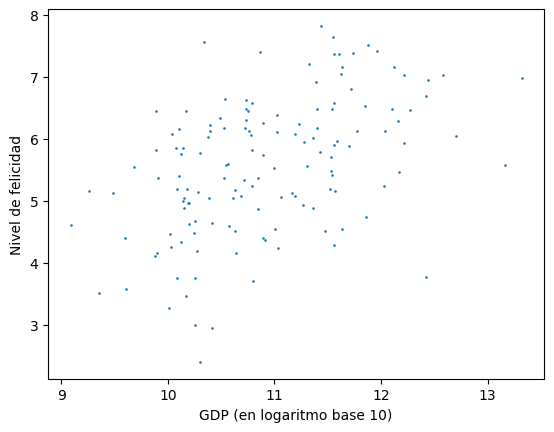

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
y = data.Felicidad
x = np.log10(data.GDP)
plt.scatter(x, y, .75)
plt.xlabel("GDP (en logaritmo base 10)")
plt.ylabel("Nivel de felicidad")
plt.show()

Para realizar la regresión lineal necesitamos los valores de $\beta_0$ y $\beta_1$. Para calcularlos, primero obtenemos el promedio de x y de y utilizando la función mean() de la librería numpy. Con estos promedios aplicamos las fórmulas correspondientes:

$\widehat{\beta}_{1} = \frac{\sum_{i =0}^{n}(x_{i}-\overline{x})(y_i-\overline{y})}{\sum_{i=0}^{n}(x_i-\overline{x})^2}$

$\widehat{\beta}_{0} = \overline{y}-(\beta_1\cdot \overline{x})$

In [48]:
xBar = np.mean(x)
yBar = np.mean(y)
B1num = sum((x-xBar)*(y-yBar))
B1den = sum((x-xBar)**2)
B1 = B1num/B1den
B0 = yBar - (B1*xBar)
print("B0 =",B0)
print("B1 =",B1)

B0 = -1.3023500570747277
B1 = 0.6281284658810408


Con estos dos datos podemos concluir que la mejor recta que representa esta población es $\widehat{y} = \widehat{\beta}_{0} + \widehat{\beta}_{1}\cdot x$. A continuación, utilizaremos la función `plot()` de **matplotlib.pyplot** para graficar dicha recta.

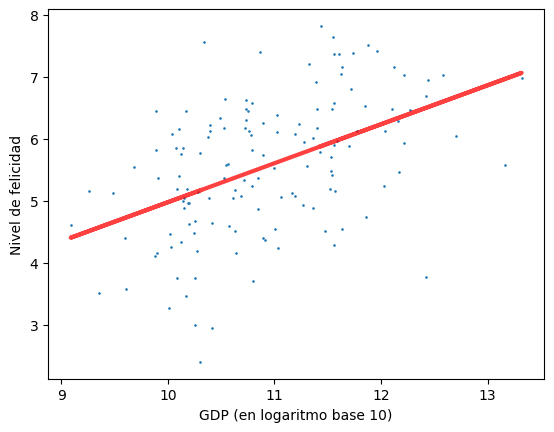

In [49]:
y_est = B0 + B1*x
plt.scatter(x, y, .75)
plt.plot(x, y_est, c = "r", linewidth = 3, alpha = 0.75)
plt.xlabel("GDP (en logaritmo base 10)")
plt.ylabel("Nivel de felicidad")
plt.show()

Lo siguiente es calcular la suma de los cuadrados de los residuos (RSS). Este valor no indica directamente qué tan relacionadas están las variables ni garantiza que nuestro modelo sea correcto, pero sí será útil para obtener otros resultados. La fórmula es la siguiente:

$RSS = \sum_{i=1}^{n}(y_i - (\widehat{\beta}_{0} + \widehat{\beta}_{1}\cdot x_i))^2$

In [50]:
RSS = sum((y - y_est)**2)
print("RSS =", RSS)

RSS = 131.3738317732635


Para evaluar qué tan bueno es nuestro modelo necesitamos calcular el error estándar de $\widehat{beta_1}$, ya que con él podemos construir un intervalo de confianza. Por estánmdar, se suele trabajar con un nivel de confianza del 95%. Para obtenerlo de forma rápida utilizaremos la distribución t de Student. Para ello, importamos la librería **scipy.stats** y usamos la función `t.interval()`. En su primer parámetro colocamos el nivel de confianza en formato decimal, y en el segundo los grados de libertad, que equivalen a `n - 2` donde n es el numero de observaciones.

Luego calculamos el error estándar, el cual está definido por la siguiente fórmula:

$SE(\widehat{\beta_1}) = \sqrt{\frac{RSS}{(n-2)\sum_{i=1}^{n}(x_i-x)^2}}$

Finalmente, construimos el intervalo de confianza, que se expresa como:

$\widehat{\beta_1} \pm (p*SE(\widehat{\beta_1}))$

In [74]:
import scipy.stats as st
n = len(x)
p = st.t.interval(0.95, n-2)[1]
SE = np.sqrt(RSS / ((n-2)*sum((x-xBar)**2)))
print("SE = ", SE)
CIlow = B1 - p*SE
CIhigh = B1 + p*SE
print("Intervalo de confianza = (", CIlow,"," ,CIhigh,")")
print("En esta población, la felicidad y el logaritmo base 10 del GDP muestran una asociación significativa, ya que el intervalo de confianza no incluye al 0.")

SE =  0.09983378435340727
Intervalo de confianza = ( 0.4307393313073311 , 0.8255176004547504 )
En esta población, la felicidad y el logaritmo base 10 del GDP muestran una asociación significativa, ya que el intervalo de confianza no incluye al 0.


Ahora, para evaluar la calidad de esta asociación utilizaremos el Error Estándar Residual (RSE) y el $R^2$. El primero nos indica el error típico en el modelo, mientras que el segundo muestra qué proporción de la variabilidad en la felicidad puede explicarse a partir del GDP. Cuanto más cercano sea el valor de $R^2$ a 1, mejor será el ajuste del modelo. El RSE y el $R^2$ se consiguen de la siguiente manera:

$RSE = \sqrt{\frac{RSS}{n-2}}$

$R^2 = 1 - \frac{RSS}{\sum_{i=1}^{n}{(\widehat{y_i}-\overline{y})^2}}$

In [75]:
RSE=np.sqrt(RSS/(n-2))
TSS=sum((y-yBar)**2)
R2=1-RSS/TSS
print("Error Estándar Residual = ",RSE)
print("R^2 =",R2)
print("El valor de R^2 se encuentra bastante alejado de 1. Esto significa que, aunque existe una asociación, el GDP explica muy poca variación en la felicidad.")

Error Estándar Residual =  0.9721807858537376
R^2 = 0.22166361654970657
El valor de R^2 se encuentra bastante alejado de 1. Esto significa que, aunque existe una asociación, el GDP explica muy poca variación en la felicidad.


Esta última celda funciona como un resumen de todo el análisis realizado. Además, incluye los valores de p-value, los cuales indican si la relación entre las variables es estadísticamente significativa (mientras más pequeño sea, mayor evidencia hay contra la hipótesis nula).

Para realizar esto, primero importamos la librería **statsmodels.api** y utilizamos la función `OLS()`. A la variable independiente x se le agrega una constante con `add_constant()`, de manera que el modelo quede definido como una función de y en términos de x y un término constante.

Después, usamos la función `fit()` para ajustar el modelo, y finalmente obtenemos el resumen completo con el comando `summary()` si queremos ver los p-values se usa el comando `pvalues`. 

Podemos observar que el p-value es de $3.82\times 10^{-9}$ el cual es menor que $0.05$ y podemos confirmar que nuestro modelo tiene una asociación significativa.

In [60]:
import statsmodels.api as sm
model = sm.OLS(y,sm.add_constant(x))
results = model.fit()
print(results.summary())
print(results.pvalues)

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           3.83e-09
Time:                        19:43:18   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2

Firma de honor: "Doy mi palabra que he realizado esta actividad con integridad academica"